This script reads experimental results derived from EC072 progrenesis analysis.

Data available is both normalized and raw. Visualize both and decide.

B11 and B12 are two batches of experiment 1
B21 and B22 are two batches of experiment 2

In [1]:
import pandas, numpy, seaborn, scipy, matplotlib_venn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [4]:
experiment_one_input_file = '/Users/adrian/research/vigur/data/lipidomics/072/progenesis/HPMVEC_POSB1_1andB1_2.csv'
metadata_file = '/Users/adrian/research/vigur/metadata/lipidomics/072/EC-072 SAMPLE LIST_BATCHES_FORLCMS_INTRA_Lipidomics_FINAL_23032022.xlsx'
annotation_file = '/Users/adrian/research/vigur/data/lipidomics/072/progenesis/EC72_Lipidomics_MSe_MSDIAL_identifications.csv'

# read information

## read data

In [5]:
df = pandas.read_csv(experiment_one_input_file, skiprows=2)
df['ID'] = df['m/z'].astype(str) + '_' + df['Retention time (min)'].astype(str)
df.set_index('ID', inplace=True)
print(df.shape)
df.head(15)

(492, 209)


,Compound,Neutral mass (Da),m/z,Charge,Retention time (min),Chromatographic peak width (min),Identifications,Anova (p),q Value,Max Fold Change,...,Accepted Compound ID,Accepted Description,Adducts,Formula,Score,Fragmentation Score,Mass Error (ppm),Isotope Similarity,Retention Time Error (mins),Compound Link
ID,,,,,,,,,,,,,,,,,,,,,
600.262199185733_4.31853333333333,4.32_600.2622m/z,NaN,600.262199,1,4.318533,0.064850,0,0.0,0.0,38373.851947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319.146338165776_2.17235,2.17_319.1463m/z,NaN,319.146338,1,2.172350,0.205817,0,0.0,0.0,6885.376378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300.993055791382_2.28628333333333,2.29_300.9931m/z,NaN,300.993056,1,2.286283,0.249517,0,0.0,0.0,3725.864457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338.342895643966_4.84413333333333,4.84_338.3429m/z,NaN,338.342896,1,4.844133,0.682783,0,0.0,0.0,456.265724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153.162806298718_4.48653333333333,4.49_153.1628m/z,NaN,153.162806,1,4.486533,0.406233,0,0.0,0.0,396.227124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193.193938075635_4.32395,4.32_193.1939m/z,NaN,193.193938,1,4.323950,0.167983,0,0.0,0.0,326.647596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384.325973483607_4.54058333333333,4.54_384.3260m/z,NaN,384.325973,1,4.540583,0.303567,0,0.0,0.0,264.627552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611.379908141772_6.00945,6.01_611.3799m/z,NaN,611.379908,1,6.009450,0.173400,0,0.0,0.0,259.003741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125.131786078946_4.49193333333333,4.49_125.1318m/z,NaN,125.131786,1,4.491933,0.124767,0,0.0,0.0,252.515109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## read metadata

In [6]:
metadata = pandas.read_excel(metadata_file, sheet_name='Master Sample List POS', index_col='File')
metadata.head()

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS


# manipulate data

Samples 285 to 405 are the appropriate.

In [7]:
normalized_data = df.iloc[:, 27:93]
print(list(normalized_data.columns)[:10])
print(list(normalized_data.columns)[-10:])
print(normalized_data.shape)
normalized_data.head()

['EC72_Lipidomics_000285', 'EC72_Lipidomics_000361', 'EC72_Lipidomics_000286', 'EC72_Lipidomics_000362', 'EC72_Lipidomics_000287', 'EC72_Lipidomics_000363', 'EC72_Lipidomics_000288', 'EC72_Lipidomics_000364', 'EC72_Lipidomics_000289', 'EC72_Lipidomics_000365']
['EC72_Lipidomics_000325', 'EC72_Lipidomics_000401', 'EC72_Lipidomics_000326', 'EC72_Lipidomics_000402', 'EC72_Lipidomics_000327', 'EC72_Lipidomics_000403', 'EC72_Lipidomics_000328', 'EC72_Lipidomics_000404', 'EC72_Lipidomics_000329', 'EC72_Lipidomics_000405']
(492, 66)


,EC72_Lipidomics_000285,EC72_Lipidomics_000361,EC72_Lipidomics_000286,EC72_Lipidomics_000362,EC72_Lipidomics_000287,EC72_Lipidomics_000363,EC72_Lipidomics_000288,EC72_Lipidomics_000364,EC72_Lipidomics_000289,EC72_Lipidomics_000365,...,EC72_Lipidomics_000325,EC72_Lipidomics_000401,EC72_Lipidomics_000326,EC72_Lipidomics_000402,EC72_Lipidomics_000327,EC72_Lipidomics_000403,EC72_Lipidomics_000328,EC72_Lipidomics_000404,EC72_Lipidomics_000329,EC72_Lipidomics_000405
ID,,,,,,,,,,,,,,,,,,,,,
600.262199185733_4.31853333333333,6.921601e+03,9.957320e+03,8.147041e+03,8.348015e+03,6.921453e+03,6.613329e+03,3.958309e+03,8.475500e+03,7.441671e+03,8.428044e+03,...,1.250039e+04,9.468955e+03,1.128564e+04,5.570780e+03,9.991603e+03,9.291879e+03,8.878265e+03,6.217605e+03,8.539308e+03,9.123581e+03
319.146338165776_2.17235,5.928276e+02,3.703880e+02,1.270376e+03,7.679636e+02,1.165555e+03,4.826311e+02,1.386554e+03,4.154348e+02,1.269918e+03,5.452881e+02,...,6.352560e+02,1.120133e+03,1.578098e+03,1.344297e+03,6.337141e+02,1.144993e+03,1.359282e+03,1.423035e+03,1.225350e+03,1.135414e+03
300.993055791382_2.28628333333333,5.729191e+05,8.655389e+05,1.090752e+06,8.518499e+05,1.086979e+06,7.302385e+05,1.398723e+06,7.643245e+05,7.008358e+05,7.675529e+05,...,1.412640e+06,1.526694e+06,1.535494e+06,6.931479e+05,1.366936e+06,1.698946e+06,1.301814e+06,1.409599e+06,1.377037e+06,1.419333e+06
338.342895643966_4.84413333333333,3.020683e+07,1.704607e+07,2.004034e+07,2.591869e+07,1.842224e+07,2.352563e+07,2.528577e+07,2.149803e+07,2.177329e+07,2.916631e+07,...,8.868864e+06,2.750696e+07,1.588395e+07,1.917582e+07,1.814139e+07,2.230074e+07,2.475583e+07,2.764402e+07,2.663901e+07,2.574934e+07
153.162806298718_4.48653333333333,1.312908e+04,8.748080e+03,2.925252e+03,4.901292e+03,6.829981e+03,7.709425e+03,3.386358e+02,8.608963e+02,4.967945e+03,6.087364e+03,...,4.938655e+03,2.484085e+03,5.641801e+04,3.511399e+04,9.109185e+02,9.944245e+01,3.634800e+03,2.669586e+03,5.456621e+03,3.798036e+03


In [8]:
log_df = numpy.log2(normalized_data + 1)
log_df.head()

,EC72_Lipidomics_000285,EC72_Lipidomics_000361,EC72_Lipidomics_000286,EC72_Lipidomics_000362,EC72_Lipidomics_000287,EC72_Lipidomics_000363,EC72_Lipidomics_000288,EC72_Lipidomics_000364,EC72_Lipidomics_000289,EC72_Lipidomics_000365,...,EC72_Lipidomics_000325,EC72_Lipidomics_000401,EC72_Lipidomics_000326,EC72_Lipidomics_000402,EC72_Lipidomics_000327,EC72_Lipidomics_000403,EC72_Lipidomics_000328,EC72_Lipidomics_000404,EC72_Lipidomics_000329,EC72_Lipidomics_000405
ID,,,,,,,,,,,,,,,,,,,,,
600.262199185733_4.31853333333333,12.757098,13.281687,12.992238,13.027390,12.757068,12.691379,11.951033,13.049253,12.861605,13.041153,...,13.609800,13.209142,13.462329,12.443922,13.286645,13.181910,13.116224,12.602375,13.060072,13.155543
319.146338165776_2.17235,9.213900,8.536783,10.312175,9.586771,10.188038,8.917763,10.438328,8.701947,10.311655,9.093518,...,9.313464,10.130741,10.624885,10.393709,9.309963,10.162383,10.409690,10.475769,10.260155,10.150273
300.993055791382_2.28628333333333,19.127974,19.723241,20.056893,19.700241,20.051894,19.478010,20.415680,19.543828,19.418719,19.549909,...,20.429964,20.541980,20.550273,19.402806,20.382515,20.696209,20.312093,20.426854,20.393137,20.436783
338.342895643966_4.84413333333333,24.848372,24.022936,24.256404,24.627490,24.134945,24.487730,24.591823,24.357701,24.376056,24.797800,...,23.080318,24.713294,23.921067,24.192785,24.112782,24.410588,24.561265,24.720464,24.667037,24.618032
153.162806298718_4.48653333333333,13.680588,13.094916,11.514838,12.259241,12.737877,12.912595,8.407845,9.751370,12.278724,12.571839,...,12.270195,11.279080,15.783894,15.099799,9.832761,6.650225,11.828057,11.382940,12.414056,11.891418


# visualization before QN

In [9]:
#seaborn.set_style("white")
#g = seaborn.violinplot(data=log_df, cut=0, bw=.15, scale="count", color='white')
#g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='Before QN')
#g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

#matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.tight_layout()
#matplotlib.pyplot.show()

variance explained [0.50319454 0.08562169]
(66, 2)


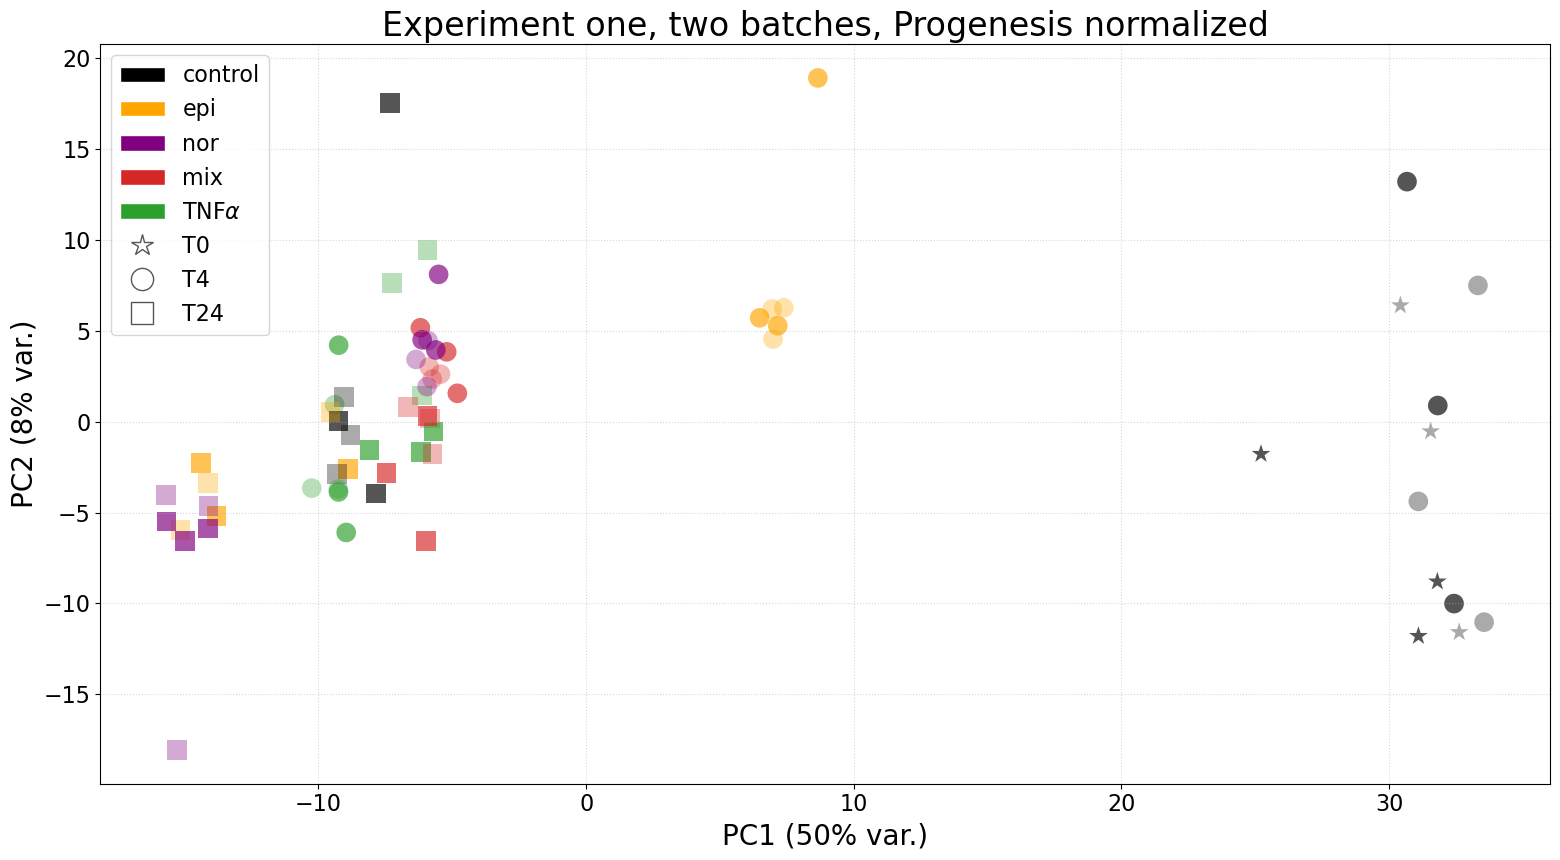

In [10]:
pca_data = log_df.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# quantile normalization

In [11]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log_df.values, axis=0), 
                             index=log_df.index, 
                             columns=log_df.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log_df.rank(method="min").stack().astype(int).map(df_mean).unstack()

In [12]:
# seaborn.set_style("white")
# g = seaborn.violinplot(data=df_qn, cut=0, bw=.15, scale="count", color='white')
# g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='After QN')
# g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

# matplotlib.pyplot.grid(ls=':')
# matplotlib.pyplot.tight_layout()
# matplotlib.pyplot.show()

# visualization after QN

variance explained [0.4633186  0.09906443]
(66, 2)


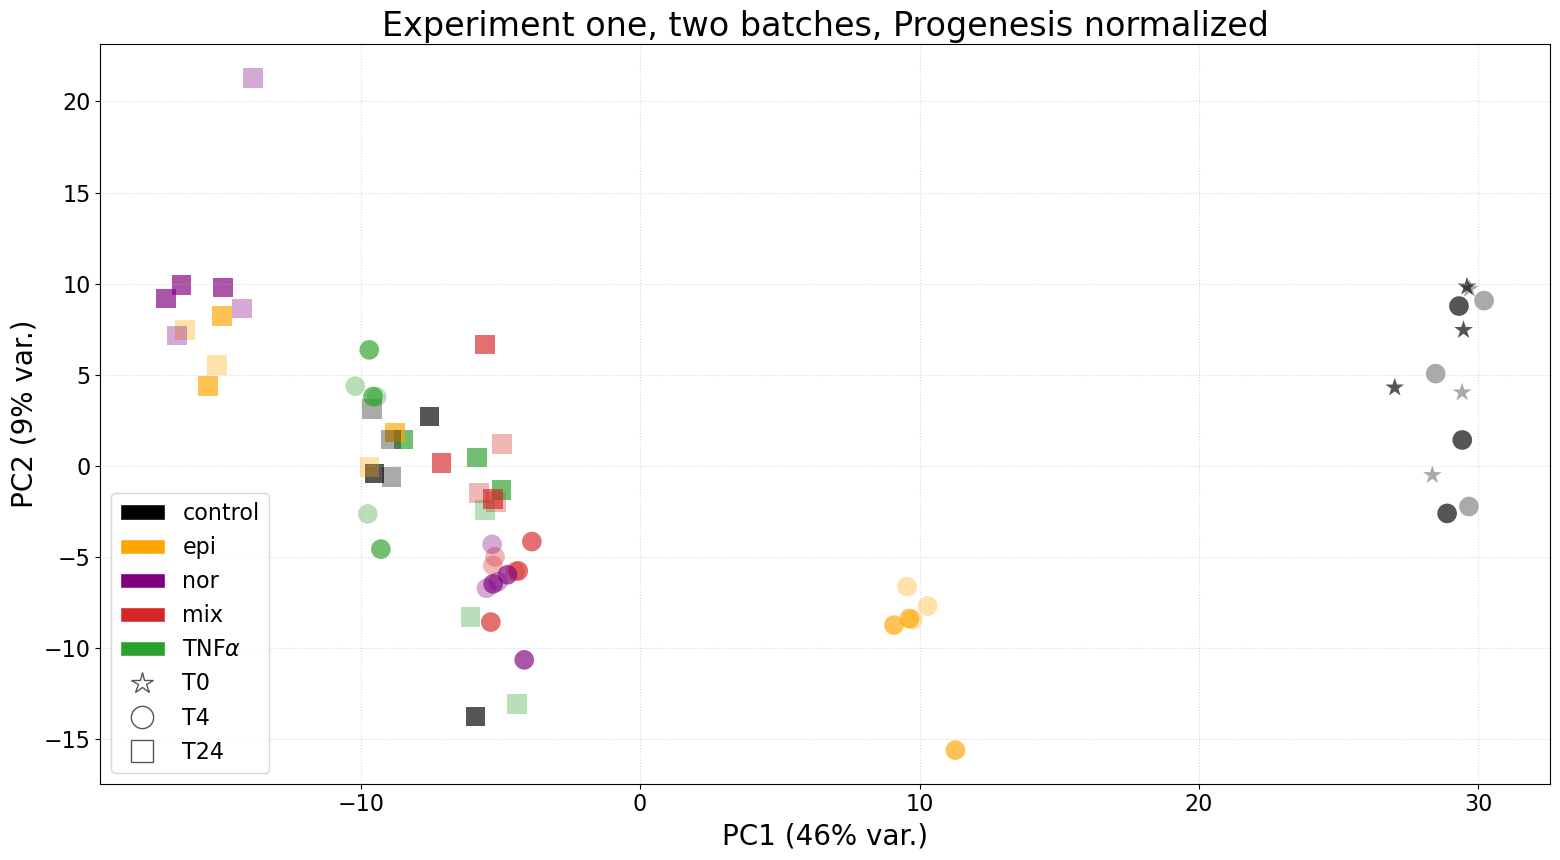

In [13]:
pca_data = df_qn.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# volcano plot

found 235 responding features in 5 µM epi on time 4


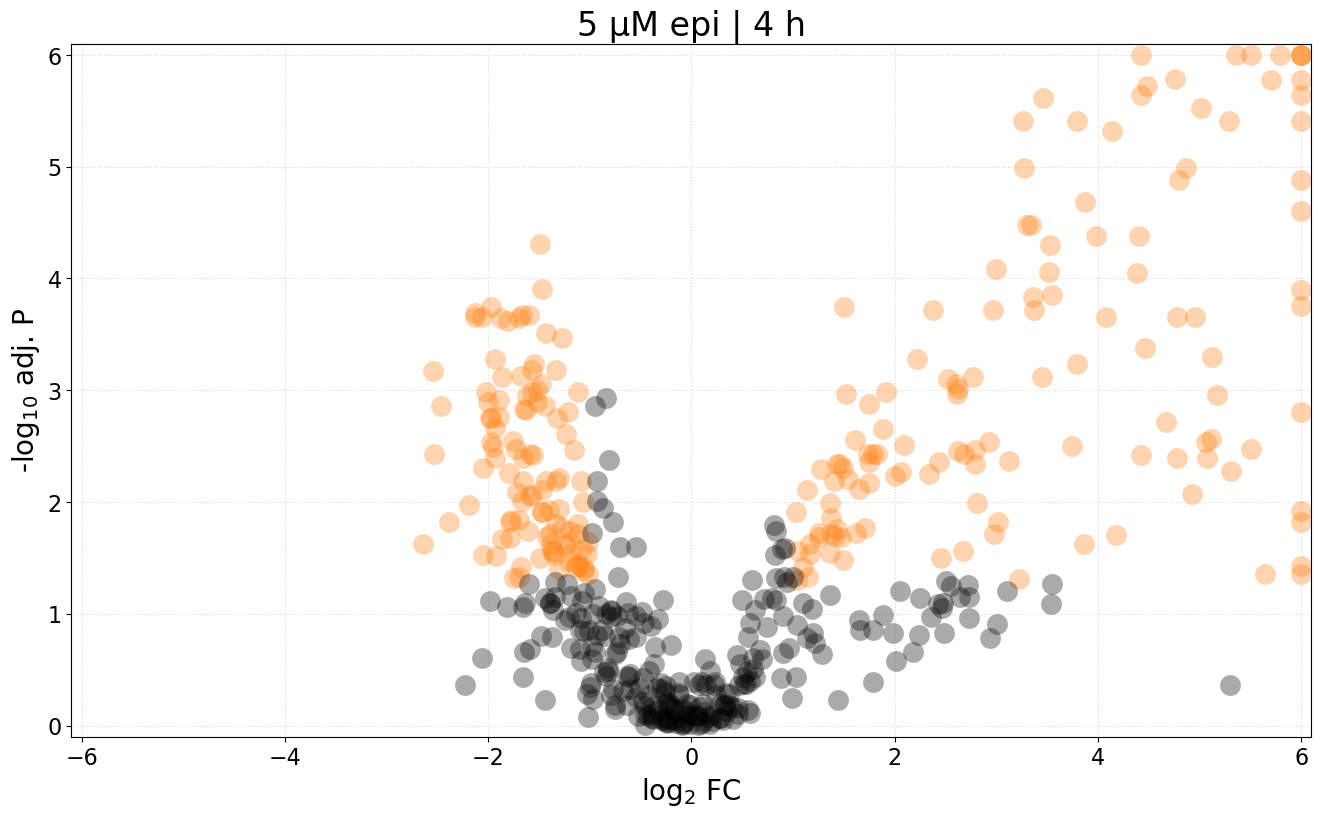

found 330 responding features in 5 µM nor on time 4


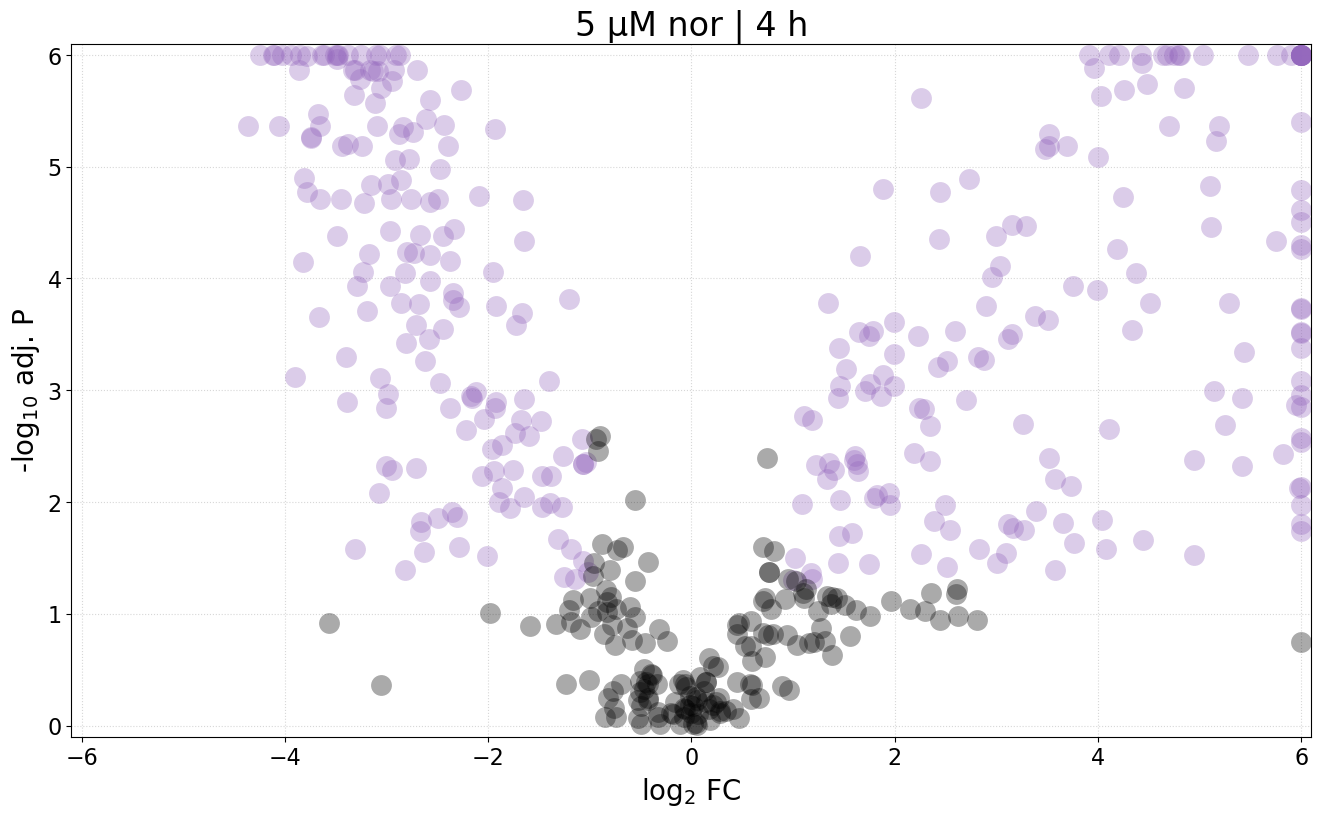

found 334 responding features in 5 µM epi:nor on time 4


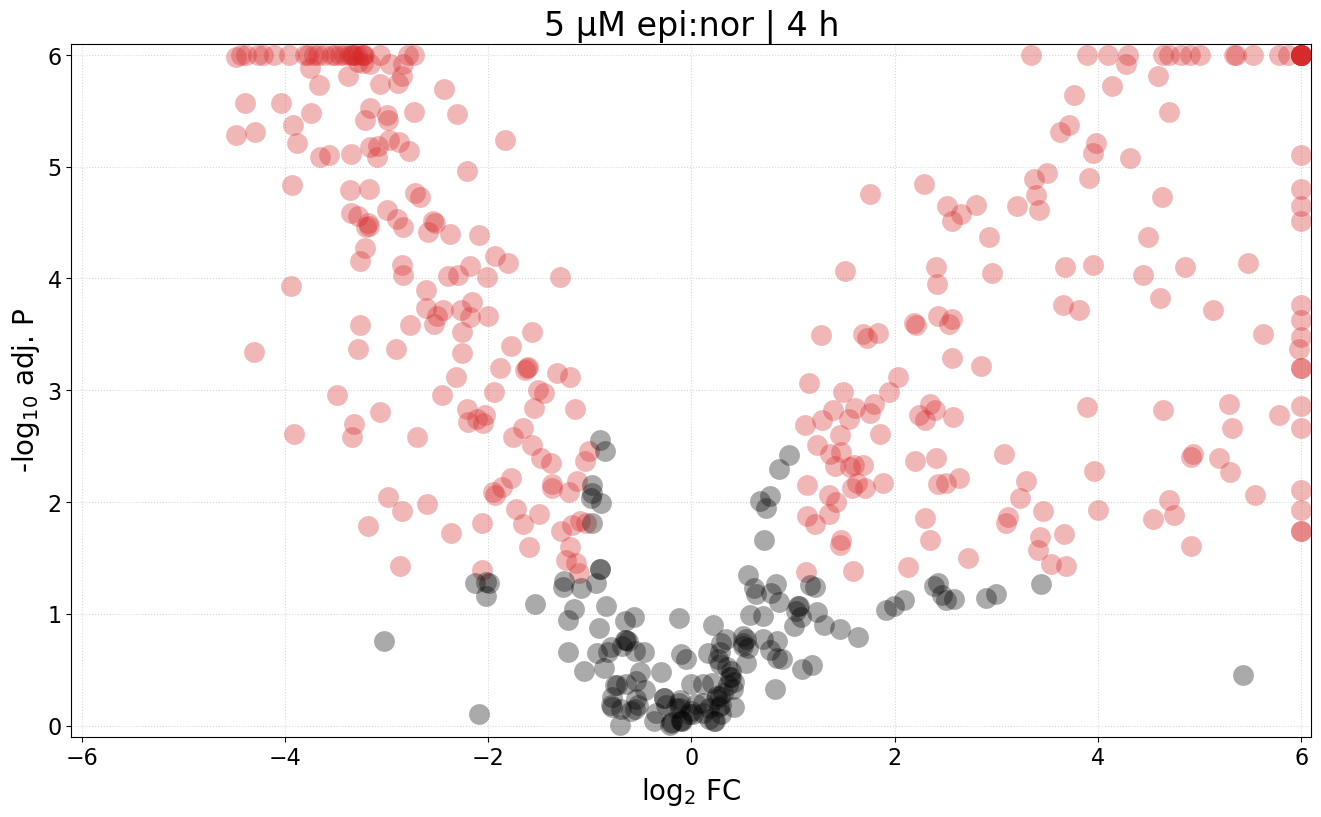

found 337 responding features in TNFa on time 4


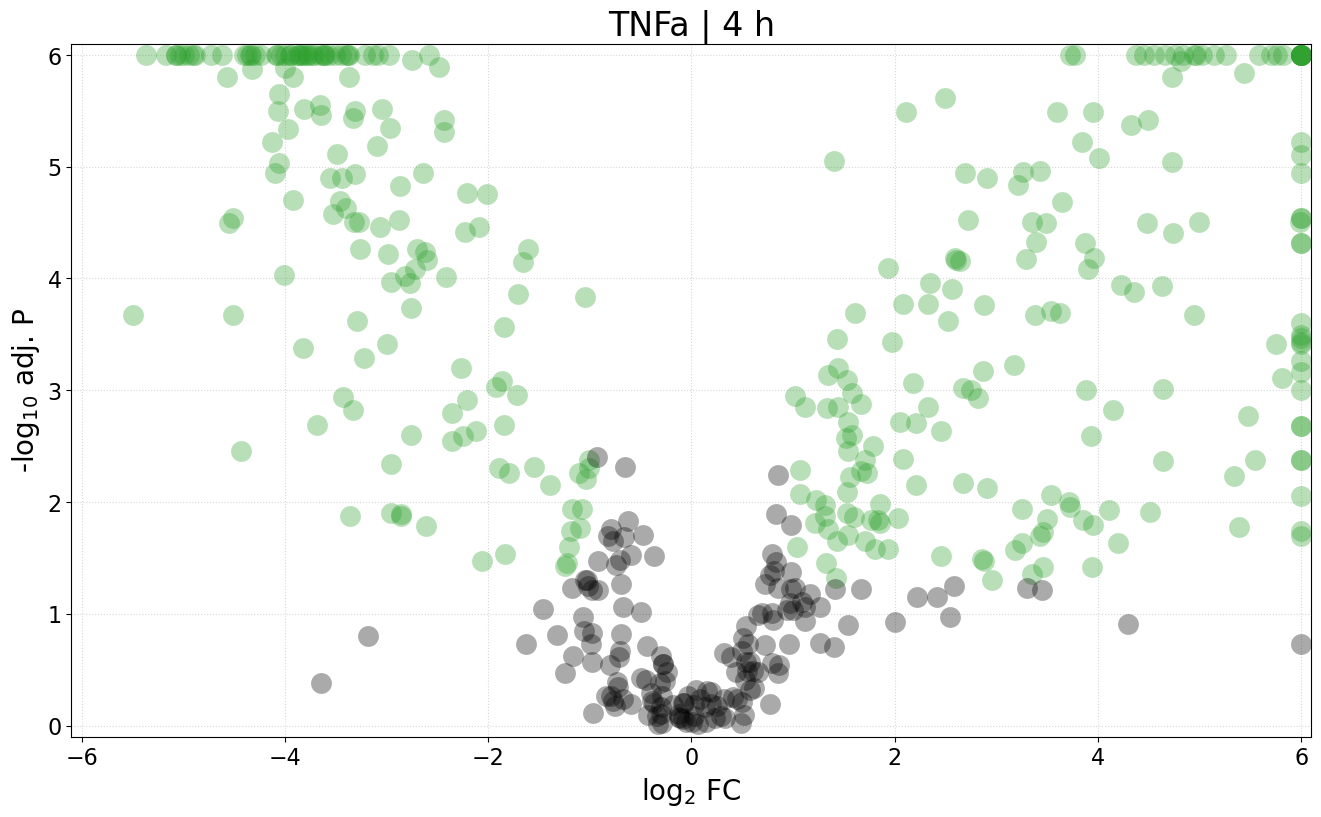

found 0 responding features in 5 µM epi on time 24


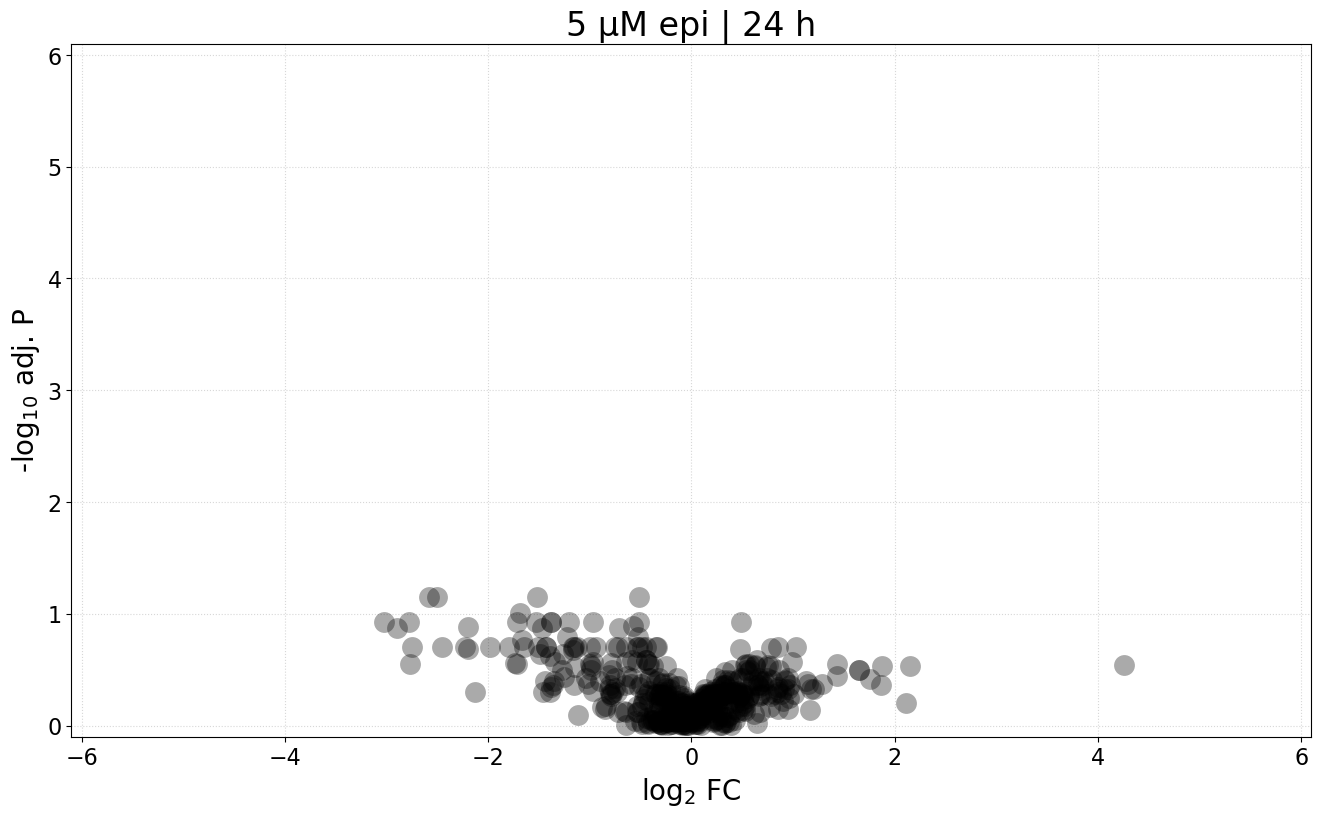

found 46 responding features in 5 µM nor on time 24


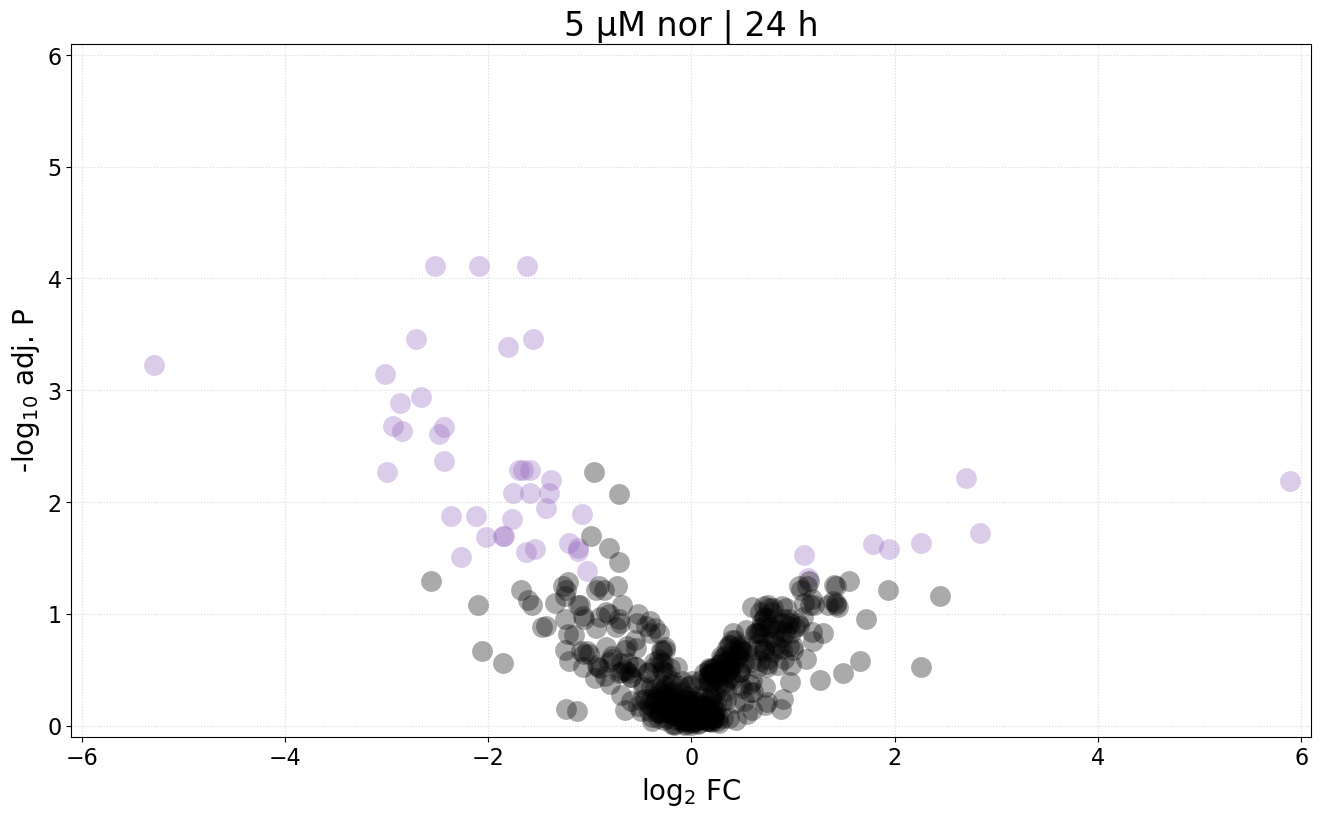

found 15 responding features in 5 µM epi:nor on time 24


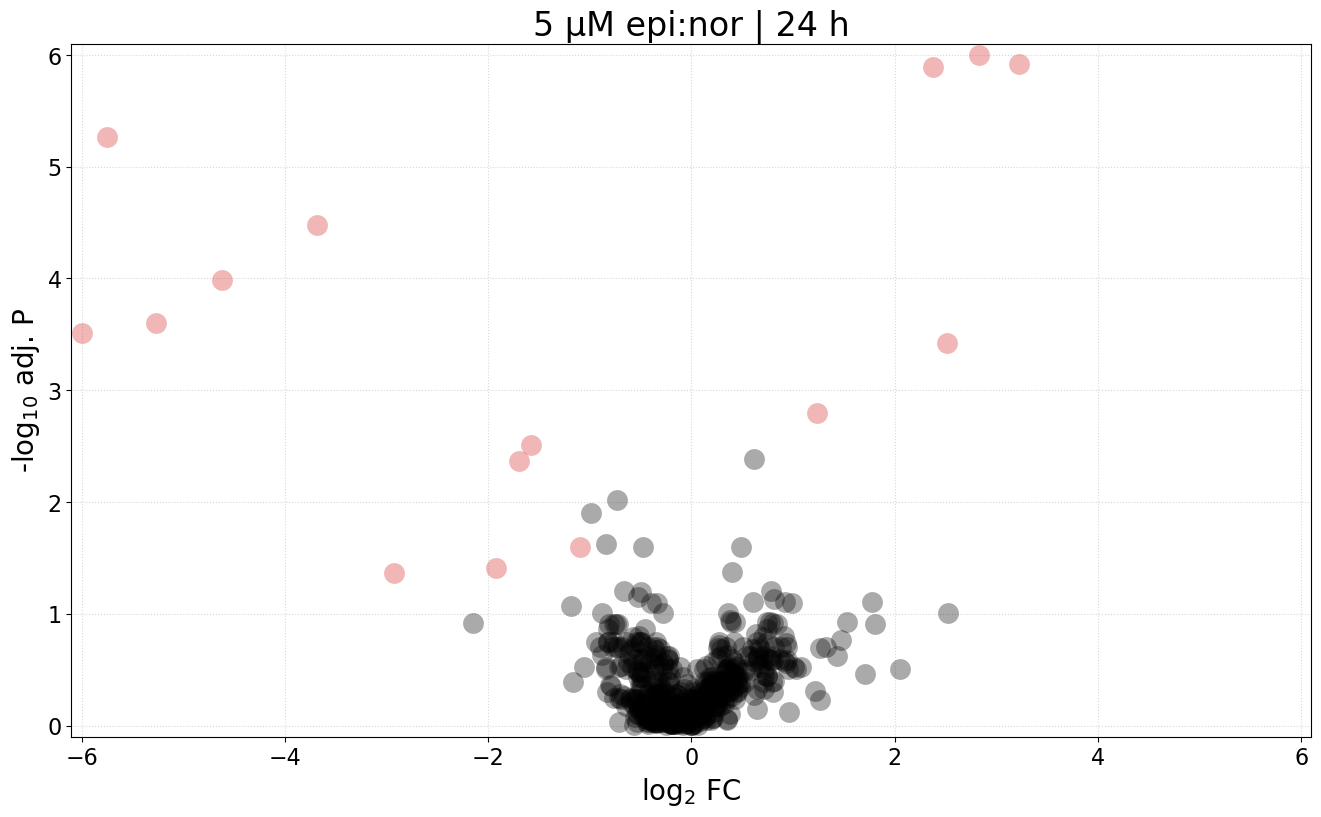

found 12 responding features in TNFa on time 24


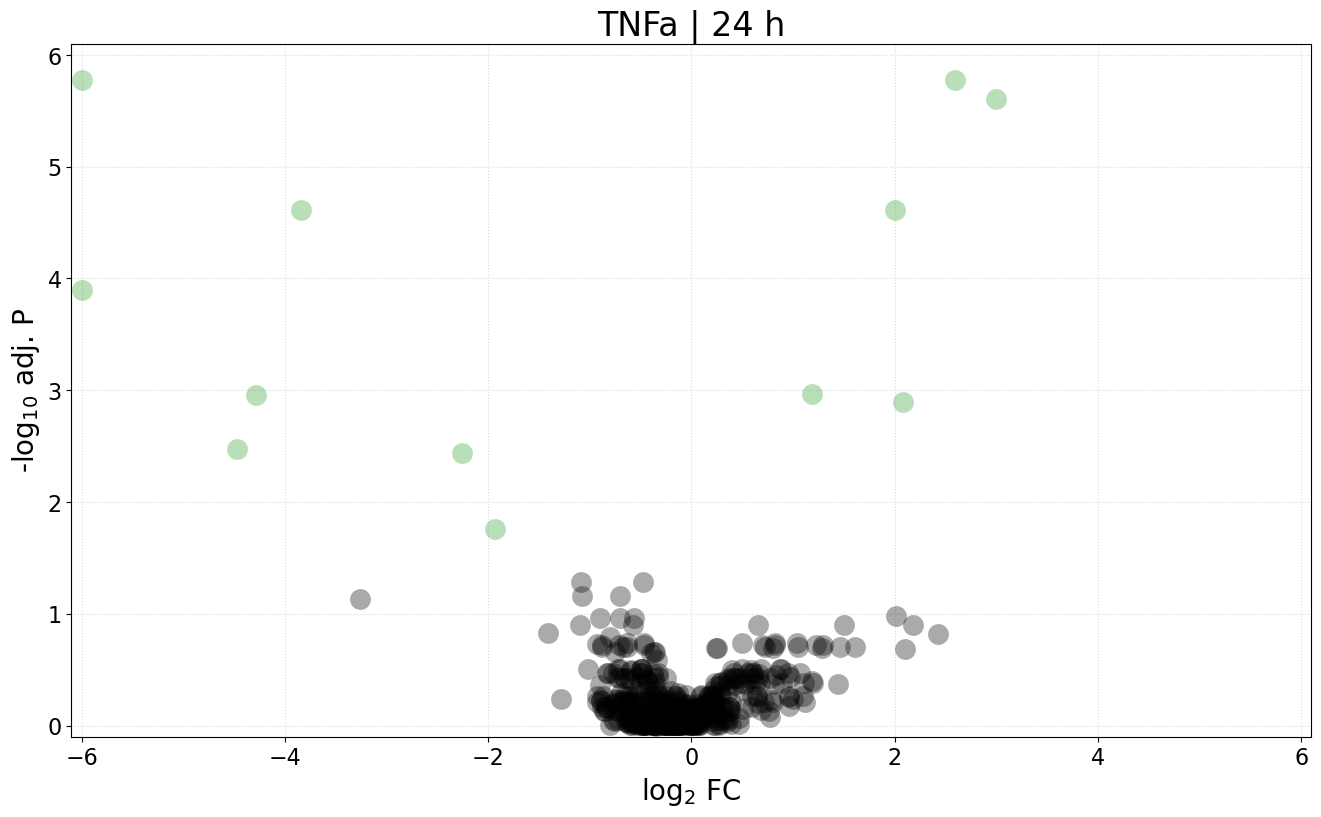

In [24]:
treatments = ['5 µM epi', '5 µM nor', '5 µM epi:nor', 'TNFa']
treatment_colors = ['tab:orange', 'tab:purple', 'tab:red', 'tab:green']
time_points = [4, 24]
fold_change_threshold = 1
clipping_threshold = 6
response_lipids = []

for time_point in time_points:
    for treatment in treatments:
        
        the_color = treatment_colors[treatments.index(treatment)]
                
        #
        # select control and treatment samples
        #
        rules = ((metadata['Treatment'] == '0 µM') | (metadata['Treatment'] == '0µM')) & (metadata['Timepoint'] == time_point) & (metadata['MS BATCH'] == 1)
        control_samples = metadata[rules].index.to_list()
        
        rules = (metadata['Treatment'] == treatment) & (metadata['Timepoint'] == time_point) & (metadata['MS BATCH'] == 1)
        treated_samples = metadata[rules].index.to_list()
                
        #
        # iterate over lipids to get position on scatter plot
        #
        fold_changes = []; pvalues = []

        for lipid in log_df.index:
            control_values = log_df.loc[lipid, control_samples].values
            treated_values = log_df.loc[lipid, treated_samples].values

            log2FC = numpy.median(treated_values) - numpy.median(control_values)
            statistic, pvalue = scipy.stats.ttest_ind(control_values, treated_values)
            fold_changes.append(log2FC); pvalues.append(pvalue)

        #
        # multiple testing correction
        #
        correction_model = statsmodels.stats.multitest.multipletests(pvalues, method='fdr_bh', alpha=0.05)
        
        #
        # discriminate responding vs non-responding lipids
        #
        respondingx = []; respondingy = []; responding_names = []
        nrespondingx = []; nrespondingy = []
        allx = []; ally = []; allnames = []
        
        for i in range(len(correction_model[0])):
            
            x = fold_changes[i]
            y = -numpy.log10(correction_model[1][i])
            
            allx.append(x); ally.append(y); allnames.append(log_df.index[i])
            
            if correction_model[0][i] == True and numpy.abs(fold_changes[i]) > fold_change_threshold:
                respondingx.append(x); respondingy.append(y); responding_names.append(log_df.index[i])
            else: # necessary for black scatter plot dots
                nrespondingx.append(x); nrespondingy.append(y)
                            
        print('found {} responding features in {} on time {}'.format(len(respondingx), treatment, time_point))
                
        #
        # store responding values
        #
        rt = [element.split('_')[1] for element in responding_names]
        mz = [element.split('_')[0] for element in responding_names]
          
        info = pandas.DataFrame()
        info = pandas.DataFrame([responding_names, mz, rt, respondingx, respondingy])
        info = info.transpose()
        info.columns = ['ID', 'm/z', 'RT', 'log2FC', '-log10 adj P']     
        info.set_index('ID', inplace=True)
        
        info.to_csv('{}.{}.quant.responding.csv'.format(treatment, time_point), sep='\t')
        
        response_lipids.append(info.index.to_list())
        
        #
        # store all values for quantification
        #
        rt = [element.split('_')[1] for element in allnames]
        mz = [element.split('_')[0] for element in allnames]
                
        info = pandas.DataFrame()
        info = pandas.DataFrame([allnames, mz, rt, allx, ally])
        info = info.transpose()
        info.columns = ['ID', 'm/z', 'RT', 'log2FC', '-log10 adj P']     
        info.set_index('ID', inplace=True)
        
        info.to_csv('{}.{}.quant.all.csv'.format(treatment, time_point), sep='\t')
                       
        #
        # generate plot
        #
        respondingx = numpy.clip(respondingx, -clipping_threshold, clipping_threshold); nrespondingx = numpy.clip(nrespondingx, -clipping_threshold, clipping_threshold)
        respondingy = numpy.clip(respondingy, -clipping_threshold, clipping_threshold); nrespondingy = numpy.clip(nrespondingy, -clipping_threshold, clipping_threshold)
        
        matplotlib.pyplot.plot(respondingx, respondingy, 'o', color=the_color, alpha=1/3, mec='None', ms=15)
        matplotlib.pyplot.plot(nrespondingx, nrespondingy, 'o', color='black', alpha=1/3, mec='None', ms=15)
        matplotlib.pyplot.ylabel('-log$_{10}$ adj. P')
        matplotlib.pyplot.xlabel('log$_2$ FC')
        matplotlib.pyplot.grid(alpha=0.5, ls=':')
        matplotlib.pyplot.title('{} | {} h'.format(treatment, time_point))
        matplotlib.pyplot.xlim([-6.1, 6.1])
        matplotlib.pyplot.ylim([-0.1, 6.1])
        
        matplotlib.pyplot.show()
        #matplotlib.pyplot.savefig('volcano.{}.{}.svg'.format(treatment, time_point))
        #matplotlib.pyplot.close()

The conclusion from this is to move forward with differences at 4 hours. Consider comparing to experiment 2 and annotate. 

# Venn diagram of common and diverging lipids at 4 h

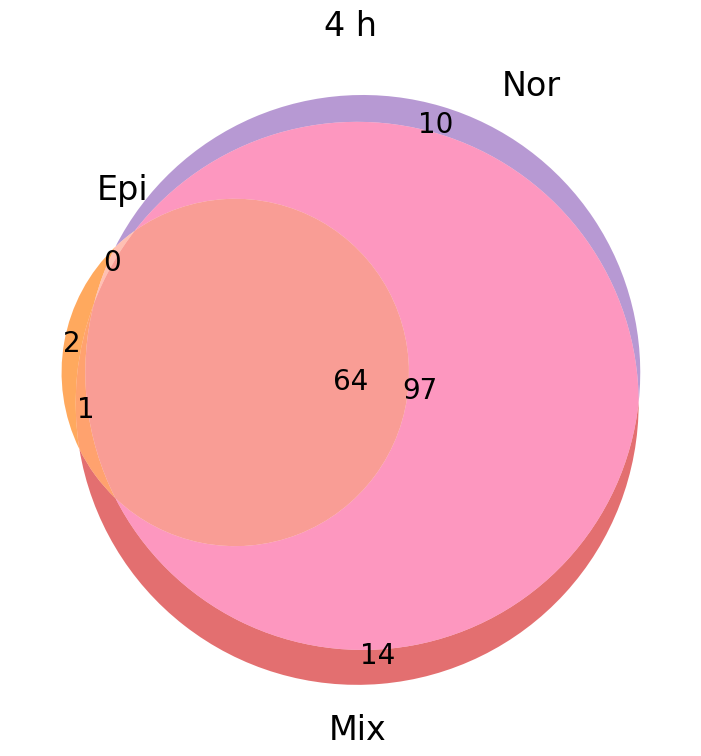

In [15]:
matplotlib_venn.venn3([set(response_lipids[0]), set(response_lipids[1]), set(response_lipids[2])], 
                      set_labels=('Epi', 'Nor', 'Mix'),
                      set_colors=('tab:orange', 'tab:purple', 'tab:red'),
                      alpha=2/3)
matplotlib.pyplot.title('4 h')

matplotlib.pyplot.savefig('venn.svg')

## store elements for downstream annotation

In [16]:
def formatter(elements, tag):
    
    a = []; b = []
    for element in elements:
        mz = element.split('_')[0]
        rt = element.split('_')[1]
        a.append(mz); b.append(rt)
    newdf = pandas.DataFrame({'m/z':a,'RT':b})
    newdf.to_csv('{}.csv'.format(tag), sep='\t')
    
    return None

core = list(set(response_lipids[0]) & set(response_lipids[1]) & set(response_lipids[2]))
formatter(core, 'core')

epi_nor = list(set(response_lipids[0]) & set(response_lipids[1]))
formatter(epi_nor, 'epi_nor')

epi_mix = list(set(response_lipids[0]) & set(response_lipids[2]))
formatter(epi_mix, 'epi_mix')

nor_mix = list(set(response_lipids[1]) & set(response_lipids[2]))
formatter(nor_mix, 'nor_mix')

only_epi = list(set(response_lipids[0]) - set(response_lipids[1]) - set(response_lipids[2]))
formatter(only_epi, 'only_epi')

only_nor = list(set(response_lipids[1]) - set(response_lipids[0]) - set(response_lipids[2]))
formatter(only_nor, 'only_nor')

only_mix = list(set(response_lipids[2]) - set(response_lipids[0]) - set(response_lipids[1]))
formatter(only_mix, 'only_mix')

# Venn diagram at 24 h

/Users/adrian/anaconda3/lib/python3.11/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


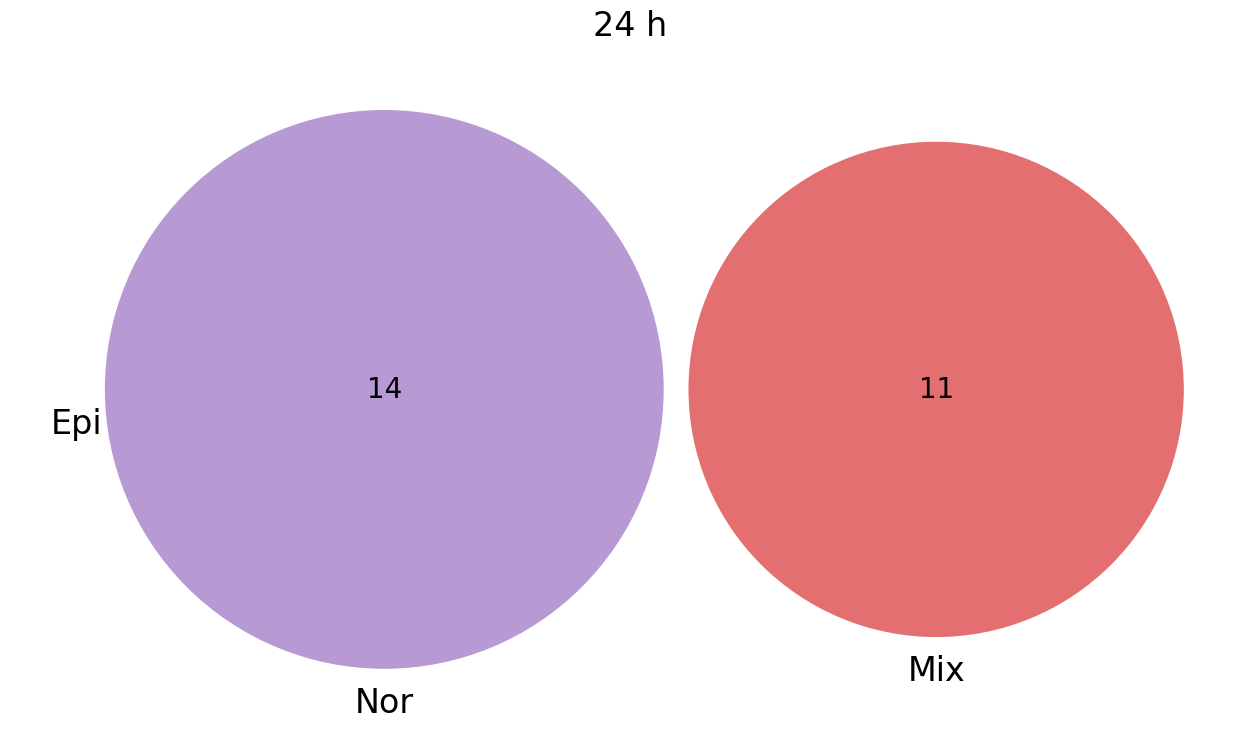

In [17]:
matplotlib_venn.venn3([set(response_lipids[4]), set(response_lipids[5]), set(response_lipids[6])], 
                      set_labels=('Epi', 'Nor', 'Mix'),
                      set_colors=('tab:orange', 'tab:purple', 'tab:red'), 
                      alpha=2/3)
matplotlib.pyplot.title('24 h')
matplotlib.pyplot.show()

# Venn diagram of treatment features observed at both 4 and 24 hours

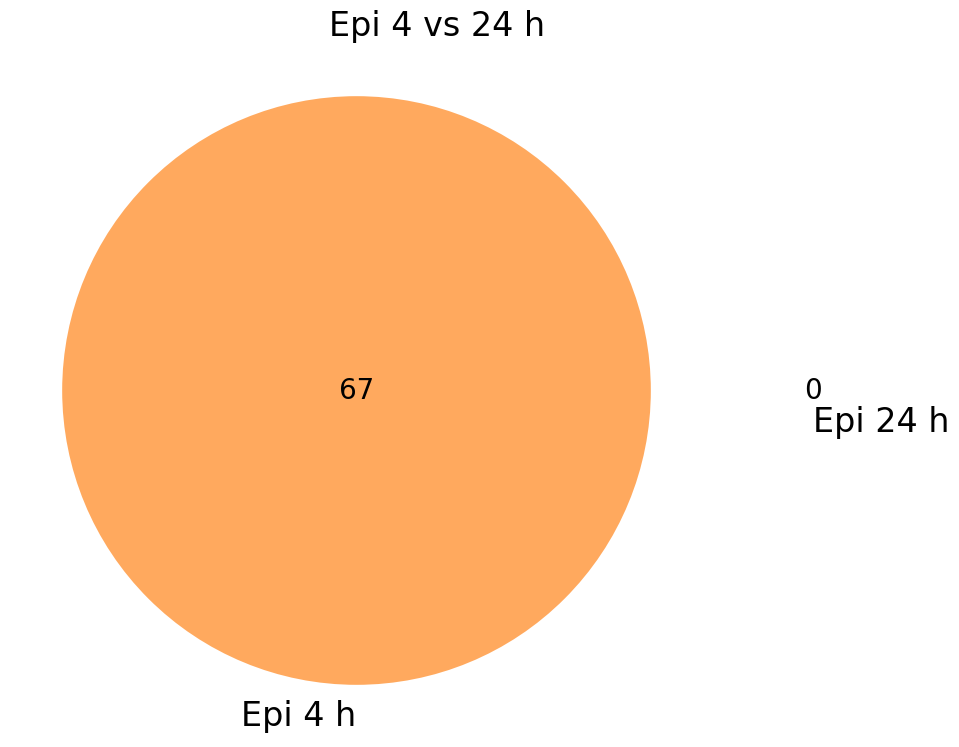

In [18]:
matplotlib_venn.venn2([set(response_lipids[0]), set(response_lipids[4])], 
                      set_labels=('Epi 4 h', 'Epi 24 h'),
                      set_colors=('tab:orange', 'tab:orange'), 
                      alpha=2/3)
matplotlib.pyplot.title('Epi 4 vs 24 h')
matplotlib.pyplot.show()

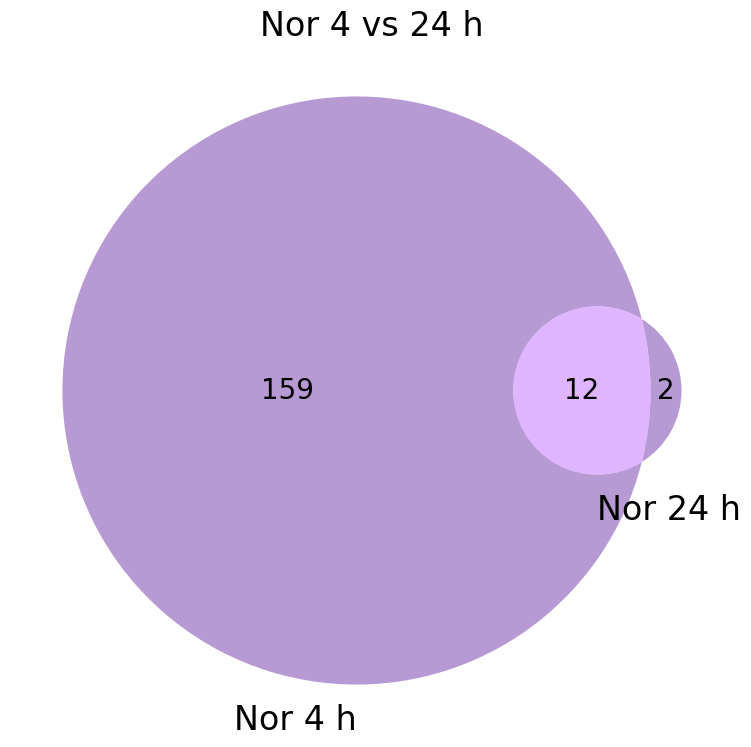

In [19]:
matplotlib_venn.venn2([set(response_lipids[1]), set(response_lipids[5])], 
                      set_labels=('Nor 4 h', 'Nor 24 h'),
                      set_colors=('tab:purple', 'tab:purple'), 
                      alpha=2/3)
matplotlib.pyplot.title('Nor 4 vs 24 h')
matplotlib.pyplot.show()

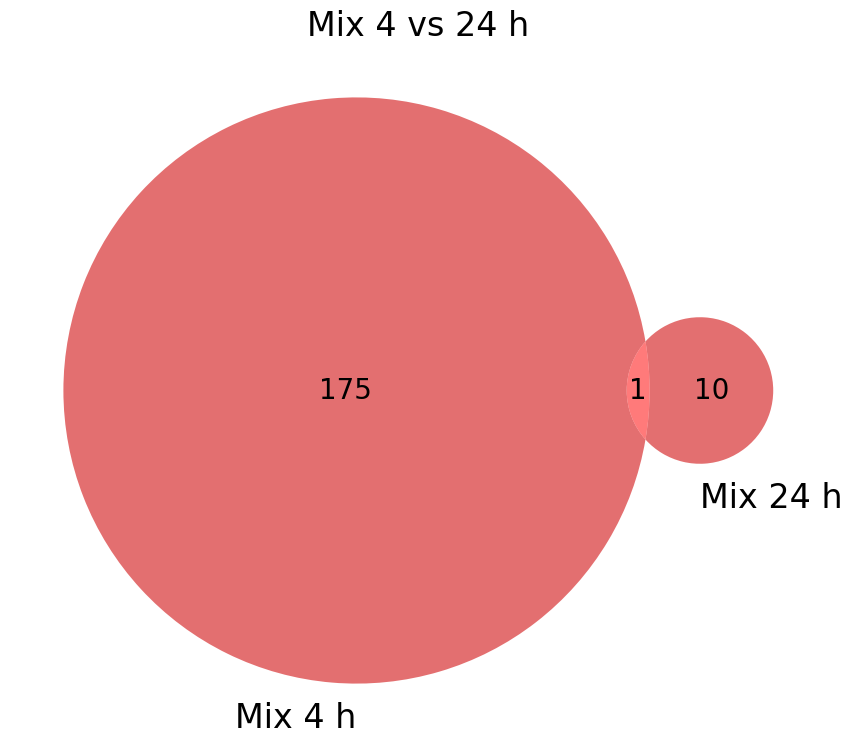

In [20]:
matplotlib_venn.venn2([set(response_lipids[2]), set(response_lipids[6])], 
                      set_labels=('Mix 4 h', 'Mix 24 h'),
                      set_colors=('tab:red', 'tab:red'), 
                      alpha=2/3)
matplotlib.pyplot.title('Mix 4 vs 24 h')
matplotlib.pyplot.show()

The response does not seem to be maintained, probably results are not representative.